<h1> Hello And Welcome to Nifty Bank Stock Analysis  </h1>
<br>
<b>Nifty Bank, or Bank Nifty</b>, is an index comprised of the most liquid and large capitalised <b>Indian banking stocks</b>. <br>It provides investors with a benchmark that captures the capital market performance of Indian bank stocks. The top stocks of the index include HDFC Bank Ltd. 31.61%, ICICI Bank Ltd. 18.20%, Axis Bank Ltd.

<h2>Phase I :</h2><br>
<ul> <b>Back Testing Using Python</b> </ul>
<ul><b> Convert to 15 min Time Frame </b></ul>
<ul> <b>Introduce VWAP (Volume Weighted Actual Price) </b></ul>

In [1]:
import pandas as pd
import numpy as np
import datetime
from fastquant import get_stock_data
from fastquant import backtest

###  Back Testing

In [2]:
df = get_stock_data("^NSEBANK", "2015-01-01", "2019-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume
dt,,,,,
2015-01-02,18752.199219,19118.849609,18752.199219,19057.800781,0
2015-01-05,19155.199219,19166.000000,18987.699219,19017.400391,0
2015-01-06,18874.599609,18874.599609,18388.349609,18430.750000,0
2015-01-07,18382.550781,18482.050781,18211.500000,18304.250000,0
2015-01-08,18587.099609,18752.300781,18486.199219,18701.400391,0


### Simple Moving Average Crossover (smac)

Starting Portfolio Value: 100000.00
2019-12-30, ===Global level arguments===
2019-12-30, init_cash : 100000
2019-12-30, buy_prop : 1
2019-12-30, sell_prop : 1
2019-12-30, commission : 0.0075
2019-12-30, stop_loss : 0
2019-12-30, stop_trail : 0
===Strategy level arguments===
fast_period : 15
slow_period : 40
2019-12-30, Final Portfolio Value: 105617.35147460937
2019-12-30, Final PnL: 5617.35
Time used (seconds): 0.4047884941101074
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:15	slow_period:40
Returns	rtot:0.05465248499266158	ravg:5.740807247128317e-05	rnorm:0.014571985365520785	rnorm100:1.4571985365520785
Sharpe	sharperatio:0.08091238684123436

<IPython.core.display.Javascript object>


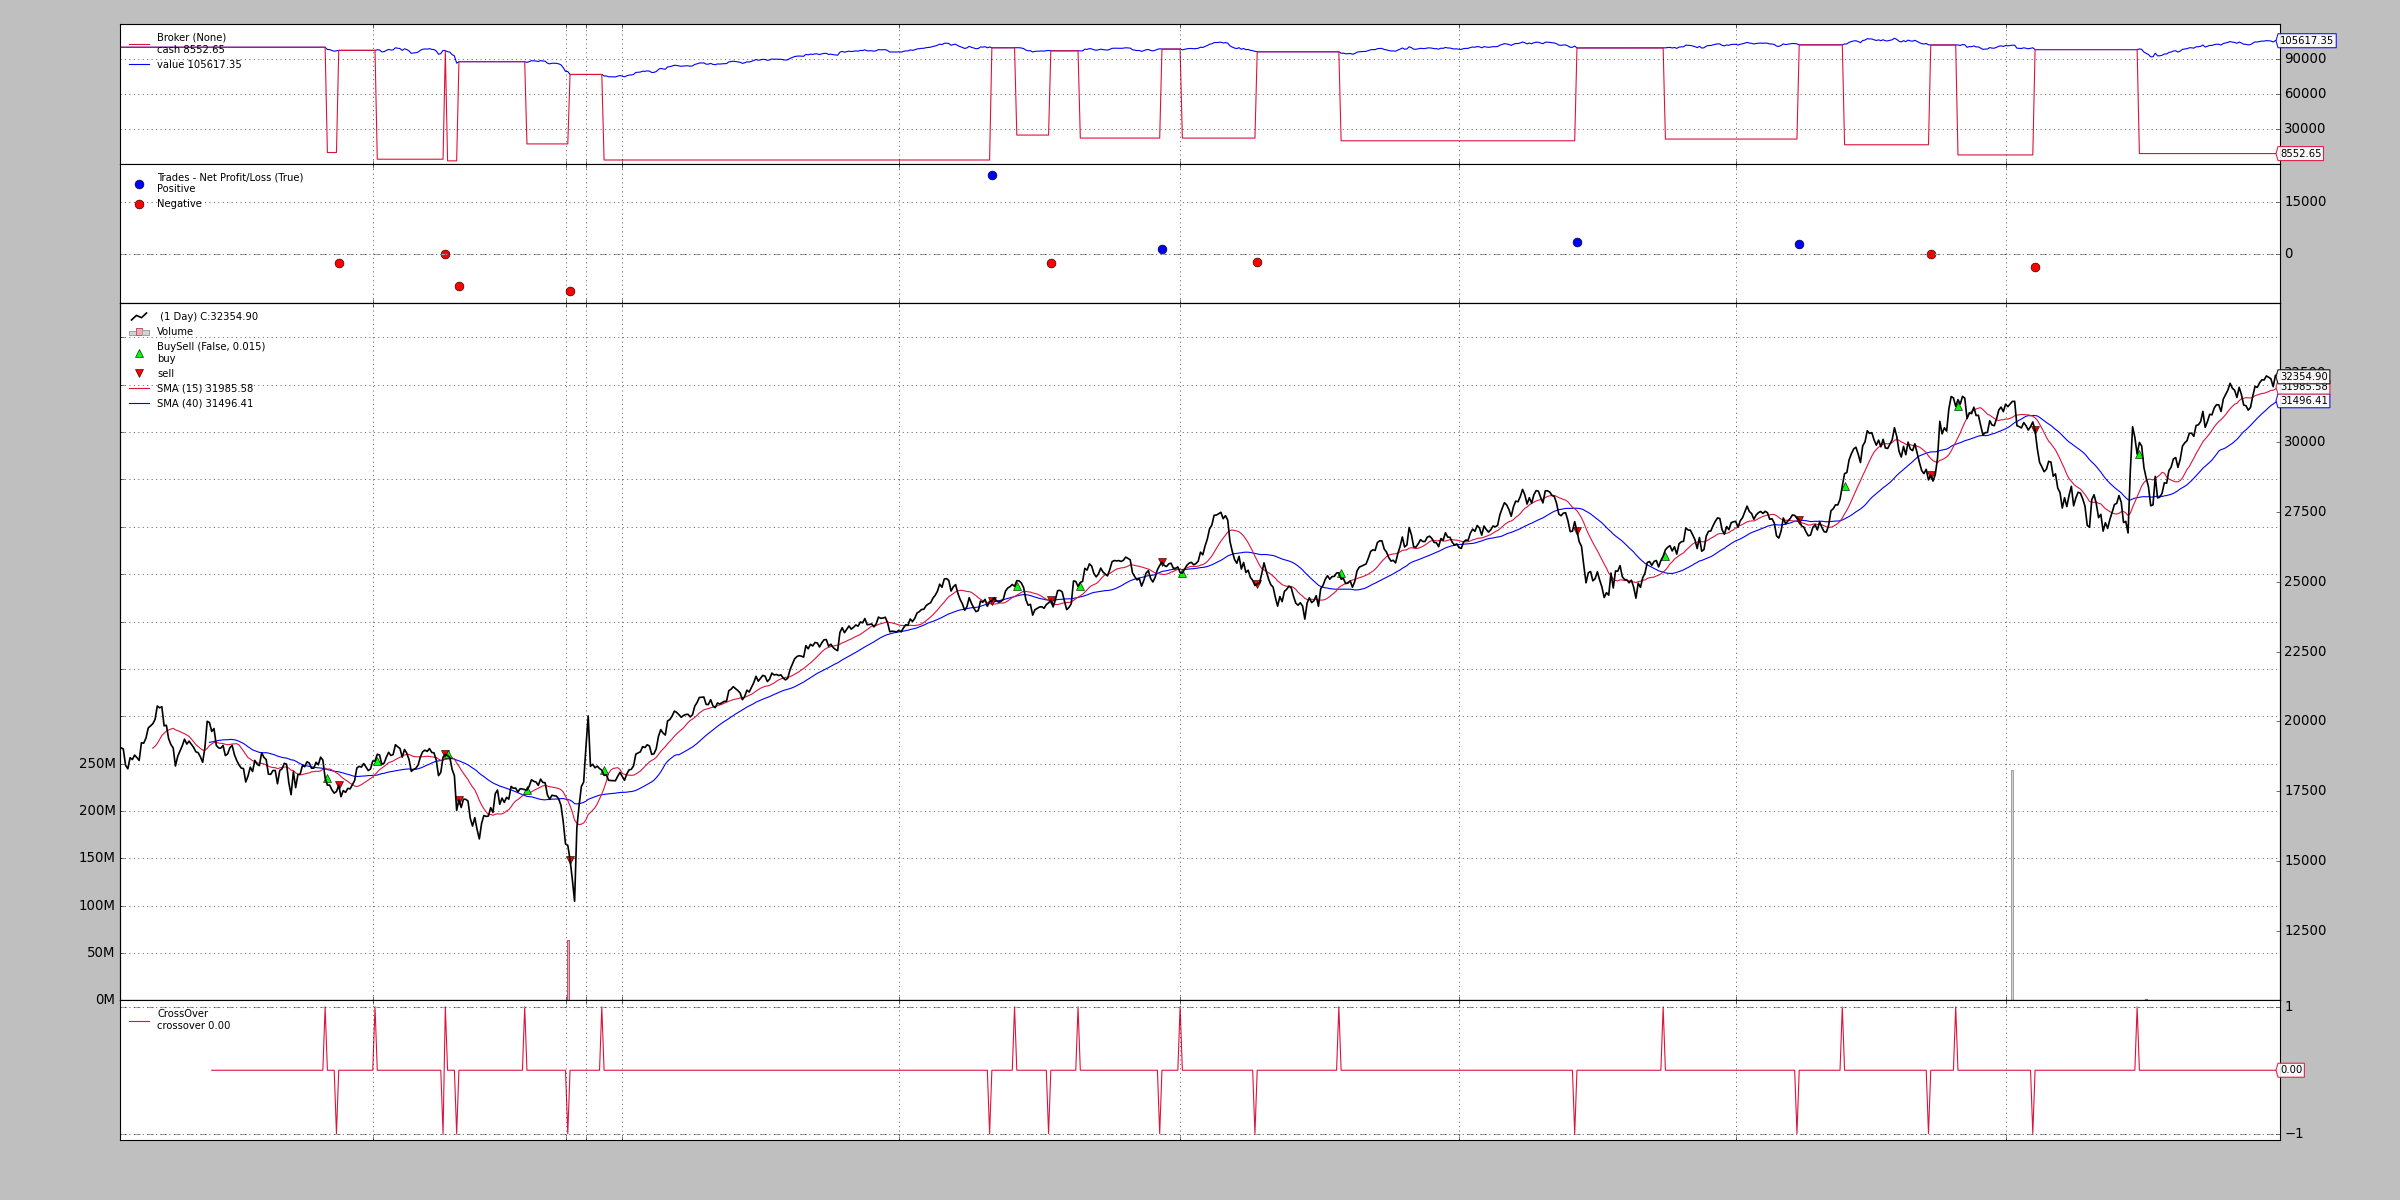

,strat_id,init_cash,buy_prop,sell_prop,commission,stop_loss,stop_trail,execution_type,channel,symbol,...,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,0,0,close,,,...,1.457199,169,1.947669,2097.937368,"{'len': 266, 'drawdown': 25.48513502929687, 'm...",25.485135,266,0.080912,5617.35,105617.351475


In [3]:
backtest('smac', df, fast_period=15, slow_period=40)

In [4]:
df1 = pd.read_excel("BankNiftyFutures_Data5Min.xlsx", parse_dates = [["Date", "Time"]], index_col=0)
df1.head()

,Ticker,Final Date format,Open 5,High 5,Low 5,Close 5,Volume 5,Year
Date_Time,,,,,,,,
2015-01-01 09:20:00,BANKNIFTY_F1,20150101,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
2015-01-01 09:25:00,BANKNIFTY_F1,20150101,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2015-01-01 09:30:00,BANKNIFTY_F1,20150101,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
2015-01-01 09:35:00,BANKNIFTY_F1,20150101,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
2015-01-01 09:40:00,BANKNIFTY_F1,20150101,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [5]:
ticker = df1['Ticker']
year = df1['Year']

### Converting to 15 MIN Frame

In [6]:
#df1.set_index("Date_Time", inplace=True)
df1 = df1.groupby(pd.Grouper(freq='15min')).agg({
                                        "Open 5":  "first",
                                        "High 5":  "max",
                                        "Low 5":   "min",
                                        "Close 5": "last",
                                        "Volume 5": "sum",
                                        "Year" : "mean",
                                        "Final Date format" : "mean",
                                       
                                    })

In [7]:
df1.head()

,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format
Date_Time,,,,,,,
2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750,2015.0,20150101.0
2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125,2015.0,20150101.0
2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575,2015.0,20150101.0
2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300,2015.0,20150101.0
2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800,2015.0,20150101.0


In [8]:
df1.reset_index(inplace=True)
df1.head()

,Date_Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format
0,2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750,2015.0,20150101.0
1,2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125,2015.0,20150101.0
2,2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575,2015.0,20150101.0
3,2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300,2015.0,20150101.0
4,2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800,2015.0,20150101.0


### Calculate the VWAP

In [9]:
df1['TP'] = (df1['High 5']+df1['Low 5']+df1['Close 5'])/3.0
df1['TradedValue']  = df1['TP']*df1['Volume 5']
df1['CumVolume'] = df1['Volume 5'].cumsum()
df1['CumTradedValue'] = df1['TradedValue'].cumsum()
df1['VWAP'] = df1['CumTradedValue'] /df1['CumVolume']

In [10]:
df1.head()

,Date_Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750,2015.0,20150101.0,18829.983067,2.367870e+09,125750,2.367870e+09,18829.983067
1,2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125,2015.0,20150101.0,18804.116533,1.976783e+09,230875,4.344653e+09,18818.205181
2,2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575,2015.0,20150101.0,18832.266933,1.498578e+09,310450,5.843231e+09,18821.809510
3,2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300,2015.0,20150101.0,18846.199867,8.914253e+08,357750,6.734656e+09,18825.034287
4,2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800,2015.0,20150101.0,18842.750000,5.238284e+08,385550,7.258484e+09,18826.311675


### Clean the Time Frame Data along with VWAP

In [11]:
df1.replace('',np.nan,inplace=True)
df1.head(200)

,Date_Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750,2015.0,20150101.0,18829.983067,2.367870e+09,125750,2.367870e+09,18829.983067
1,2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125,2015.0,20150101.0,18804.116533,1.976783e+09,230875,4.344653e+09,18818.205181
2,2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575,2015.0,20150101.0,18832.266933,1.498578e+09,310450,5.843231e+09,18821.809510
3,2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300,2015.0,20150101.0,18846.199867,8.914253e+08,357750,6.734656e+09,18825.034287
4,2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800,2015.0,20150101.0,18842.750000,5.238284e+08,385550,7.258484e+09,18826.311675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2015-01-03 10:00:00,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,3760475,NaN,NaN
196,2015-01-03 10:15:00,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,3760475,NaN,NaN
197,2015-01-03 10:30:00,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,3760475,NaN,NaN
198,2015-01-03 10:45:00,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,3760475,NaN,NaN


In [12]:
df1.dropna(axis=0,inplace=True)
df1.head()

,Date_Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01 09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750,2015.0,20150101.0,18829.983067,2.367870e+09,125750,2.367870e+09,18829.983067
1,2015-01-01 09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125,2015.0,20150101.0,18804.116533,1.976783e+09,230875,4.344653e+09,18818.205181
2,2015-01-01 09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575,2015.0,20150101.0,18832.266933,1.498578e+09,310450,5.843231e+09,18821.809510
3,2015-01-01 10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300,2015.0,20150101.0,18846.199867,8.914253e+08,357750,6.734656e+09,18825.034287
4,2015-01-01 10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800,2015.0,20150101.0,18842.750000,5.238284e+08,385550,7.258484e+09,18826.311675


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30640 entries, 0 to 175224
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_Time          30640 non-null  datetime64[ns]
 1   Open 5             30640 non-null  float64       
 2   High 5             30640 non-null  float64       
 3   Low 5              30640 non-null  float64       
 4   Close 5            30640 non-null  float64       
 5   Volume 5           30640 non-null  int64         
 6   Year               30640 non-null  float64       
 7   Final Date format  30640 non-null  float64       
 8   TP                 30640 non-null  float64       
 9   TradedValue        30640 non-null  float64       
 10  CumVolume          30640 non-null  int64         
 11  CumTradedValue     30640 non-null  float64       
 12  VWAP               30640 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 3.

### Exporting to Excel 

In [14]:
df1.to_excel('Output.xlsx',index=False)

Some Work is to be performed in Excel

1. Decision of <b> Buy Sell</b> based on Candle Close and VWAP
2. Calculating the Price of Trade <b>(Buy / Sell)</b>
3. Calculating the Stop Loss for Each Trade <b>(Buy / Sell)</b>

## Some Considerations 

In [15]:
import numpy as np
import pandas as pd

In [16]:
df =pd.read_excel('Output.xlsx')
df.head()

,Date_Time,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format,TP,TradedValue,CumVolume,CumTradedValue,VWAP,Buy/Sell,Price,Stoploss Price
0,2015-01-01 09:15:00,09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750,2015,20150101,18829.983067,2.367870e+09,125750,2.367870e+09,18829.983067,None,None,None
1,2015-01-01 09:30:00,09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125,2015,20150101,18804.116533,1.976783e+09,230875,4.344653e+09,18818.205181,None,None,None
2,2015-01-01 09:45:00,09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575,2015,20150101,18832.266933,1.498578e+09,310450,5.843231e+09,18821.809510,SELL,18774.9,18833.5
3,2015-01-01 10:00:00,10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300,2015,20150101,18846.199867,8.914253e+08,357750,6.734656e+09,18825.034287,BUY,18850.1,18799.9
4,2015-01-01 10:15:00,10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800,2015,20150101,18842.750000,5.238284e+08,385550,7.258484e+09,18826.311675,BUY,18858.7,18829.9


###  Checking Whether Stoploss is Hit or Not Hit

In [17]:
def detecthit (df):
    low  = df['Low 5'].values
    high = df['High 5'].values
    stoploss = df['Stoploss Price'].values
    bysl = df['Buy/Sell'].values
    #print(low,high,stoploss,bysl)
    hit = []
    for i in range(len(low)):
        if bysl[i] == 'None':
            hit.append('None')
        elif bysl[i] == 'SELL':
            till = i + 24 - (i%24) + 1
            flag = 0
            
            for j in range(i,till):
                if stoploss[i] <= high[j]:
                    flag = 1
                    break
            if flag == 1:
                hit.append('Hit')
            else:
                hit.append('NoHit')
        elif bysl[i] == 'BUY':
            till1 = i + 24 - (i%24) + 1
            flag1 = 0
            
            for k in range(i,till1):
                if stoploss[i] >= low[k]:
                    flag1 = 1
                    break
            if flag1 == 1:
                hit.append('Hit')
            else:
                hit.append('NoHit')
        else:
            continue
    return hit

In [18]:
df['Hit'] = detecthit(df)
df.head()

,Date_Time,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format,TP,TradedValue,CumVolume,CumTradedValue,VWAP,Buy/Sell,Price,Stoploss Price,Hit
0,2015-01-01 09:15:00,09:15:00,18861.3496,18867.9492,18793.0,18829.0000,125750,2015,20150101,18829.983067,2.367870e+09,125750,2.367870e+09,18829.983067,None,None,None,None
1,2015-01-01 09:30:00,09:30:00,18826.9492,18833.4004,18775.0,18803.9492,105125,2015,20150101,18804.116533,1.976783e+09,230875,4.344653e+09,18818.205181,None,None,None,None
2,2015-01-01 09:45:00,09:45:00,18803.9492,18850.0000,18800.0,18846.8008,79575,2015,20150101,18832.266933,1.498578e+09,310450,5.843231e+09,18821.809510,SELL,18774.9,18833.5,Hit
3,2015-01-01 10:00:00,10:00:00,18846.9004,18858.5996,18830.0,18850.0000,47300,2015,20150101,18846.199867,8.914253e+08,357750,6.734656e+09,18825.034287,BUY,18850.1,18799.9,NoHit
4,2015-01-01 10:15:00,10:15:00,18848.5508,18858.0000,18830.0,18840.2500,27800,2015,20150101,18842.750000,5.238284e+08,385550,7.258484e+09,18826.311675,BUY,18858.7,18829.9,Hit


###  Determining the Exit Price for the Trade

In [19]:
def exitprice (df):
    opening  = df['Open 5'].values
    hit = df['Hit'].values
    stoploss = df['Stoploss Price'].values
    eprice = []
    for i in range(len(hit)):
        if hit[i]== 'None':
            eprice.append('None')
        elif hit[i]=='Hit':
            eprice.append(stoploss[i])
        elif hit[i]=='NoHit':
            till = i + 24 - (i%24) + 1
            eprice.append(opening[till])
        else:
            continue
    return eprice

In [20]:
df['Exit Price'] = exitprice(df)
df.head(10)

,Date_Time,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format,TP,TradedValue,CumVolume,CumTradedValue,VWAP,Buy/Sell,Price,Stoploss Price,Hit,Exit Price
0,2015-01-01 09:15:00,09:15:00,18861.3496,18867.9492,18793.0000,18829.0000,125750,2015,20150101,18829.983067,2.367870e+09,125750,2.367870e+09,18829.983067,None,None,None,None,None
1,2015-01-01 09:30:00,09:30:00,18826.9492,18833.4004,18775.0000,18803.9492,105125,2015,20150101,18804.116533,1.976783e+09,230875,4.344653e+09,18818.205181,None,None,None,None,None
2,2015-01-01 09:45:00,09:45:00,18803.9492,18850.0000,18800.0000,18846.8008,79575,2015,20150101,18832.266933,1.498578e+09,310450,5.843231e+09,18821.809510,SELL,18774.9,18833.5,Hit,18833.5
3,2015-01-01 10:00:00,10:00:00,18846.9004,18858.5996,18830.0000,18850.0000,47300,2015,20150101,18846.199867,8.914253e+08,357750,6.734656e+09,18825.034287,BUY,18850.1,18799.9,NoHit,18899.8
4,2015-01-01 10:15:00,10:15:00,18848.5508,18858.0000,18830.0000,18840.2500,27800,2015,20150101,18842.750000,5.238284e+08,385550,7.258484e+09,18826.311675,BUY,18858.7,18829.9,Hit,18829.9
5,2015-01-01 10:30:00,10:30:00,18843.7500,18843.7500,18825.0000,18840.0000,14150,2015,20150101,18836.250000,2.665329e+08,399700,7.525017e+09,18826.663507,BUY,18858.1,18829.9,Hit,18829.9
6,2015-01-01 10:45:00,10:45:00,18836.0000,18846.2500,18828.0000,18845.0000,13325,2015,20150101,18839.750000,2.510397e+08,413025,7.776057e+09,18827.085703,BUY,18843.8,18824.9,NoHit,18899.8
7,2015-01-01 11:00:00,11:00:00,18846.0000,18848.6992,18832.0000,18840.0996,20075,2015,20150101,18840.266267,3.782183e+08,433100,8.154275e+09,18827.696647,BUY,18846.3,18827.9,NoHit,18899.8
8,2015-01-01 11:15:00,11:15:00,18842.0000,18889.9004,18837.4004,18870.0000,86025,2015,20150101,18865.766933,1.622928e+09,519125,9.777203e+09,18834.005332,BUY,18848.8,18831.9,NoHit,18899.8
9,2015-01-01 11:30:00,11:30:00,18870.0000,18878.0000,18851.9492,18855.0508,20875,2015,20150101,18861.666667,3.937373e+08,540000,1.017094e+10,18835.074648,BUY,18890,18837.3,NoHit,18899.8


###  Calculating the Profit and Loss of the Trade

In [21]:
def profloss(df):
    bysl = df['Buy/Sell'].values
    price = df['Price'].values
    eprice = df['Exit Price'].values
    prolss = []
    for bs,p,ep in zip(bysl,price,eprice):
        if bs == 'SELL':
            prolss.append(p-ep)
        elif bs =='BUY':
            prolss.append(ep-p)
        else:
            prolss.append('None')
    return prolss

In [22]:
df['Profit-Loss'] = profloss(df)
df.head(10)

,Date_Time,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Final Date format,TP,TradedValue,CumVolume,CumTradedValue,VWAP,Buy/Sell,Price,Stoploss Price,Hit,Exit Price,Profit-Loss
0,2015-01-01 09:15:00,09:15:00,18861.3496,18867.9492,18793.0000,18829.0000,125750,2015,20150101,18829.983067,2.367870e+09,125750,2.367870e+09,18829.983067,None,None,None,None,None,None
1,2015-01-01 09:30:00,09:30:00,18826.9492,18833.4004,18775.0000,18803.9492,105125,2015,20150101,18804.116533,1.976783e+09,230875,4.344653e+09,18818.205181,None,None,None,None,None,None
2,2015-01-01 09:45:00,09:45:00,18803.9492,18850.0000,18800.0000,18846.8008,79575,2015,20150101,18832.266933,1.498578e+09,310450,5.843231e+09,18821.809510,SELL,18774.9,18833.5,Hit,18833.5,-58.6004
3,2015-01-01 10:00:00,10:00:00,18846.9004,18858.5996,18830.0000,18850.0000,47300,2015,20150101,18846.199867,8.914253e+08,357750,6.734656e+09,18825.034287,BUY,18850.1,18799.9,NoHit,18899.8,49.7008
4,2015-01-01 10:15:00,10:15:00,18848.5508,18858.0000,18830.0000,18840.2500,27800,2015,20150101,18842.750000,5.238284e+08,385550,7.258484e+09,18826.311675,BUY,18858.7,18829.9,Hit,18829.9,-28.7996
5,2015-01-01 10:30:00,10:30:00,18843.7500,18843.7500,18825.0000,18840.0000,14150,2015,20150101,18836.250000,2.665329e+08,399700,7.525017e+09,18826.663507,BUY,18858.1,18829.9,Hit,18829.9,-28.2
6,2015-01-01 10:45:00,10:45:00,18836.0000,18846.2500,18828.0000,18845.0000,13325,2015,20150101,18839.750000,2.510397e+08,413025,7.776057e+09,18827.085703,BUY,18843.8,18824.9,NoHit,18899.8,55.9508
7,2015-01-01 11:00:00,11:00:00,18846.0000,18848.6992,18832.0000,18840.0996,20075,2015,20150101,18840.266267,3.782183e+08,433100,8.154275e+09,18827.696647,BUY,18846.3,18827.9,NoHit,18899.8,53.4508
8,2015-01-01 11:15:00,11:15:00,18842.0000,18889.9004,18837.4004,18870.0000,86025,2015,20150101,18865.766933,1.622928e+09,519125,9.777203e+09,18834.005332,BUY,18848.8,18831.9,NoHit,18899.8,51.0016
9,2015-01-01 11:30:00,11:30:00,18870.0000,18878.0000,18851.9492,18855.0508,20875,2015,20150101,18861.666667,3.937373e+08,540000,1.017094e+10,18835.074648,BUY,18890,18837.3,NoHit,18899.8,9.8004


### Total Profit/Loss Incurred 

In [23]:
sum(df['Profit-Loss'].replace("None",0))


-538214.8175999405

### Profit/Loss Segregated Year Wise

In [24]:
df1=df[['Year','Profit-Loss']].replace("None",0)
df1.groupby('Year').agg({'Profit-Loss':'sum'})

,Profit-Loss
Year,
2015,-131682.3692
2016,-116390.8772
2017,-57252.8000
2018,-73938.7412
2019,-158950.0300


### Profit/Loss Segregated Day Wise

In [25]:
df1=df[['Final Date format','Profit-Loss']].replace("None",0)
df1.groupby('Final Date format').agg({'Profit-Loss':'sum'})

,Profit-Loss
Final Date format,
20150101,275.0128
20150102,-301.3476
20150105,-803.1480
20150106,504.2044
20150107,-1073.1992
...,...
20191224,-623.2024
20191226,207.9008
20191227,-19.1488


###  The Data is pushed Back to Excel

In [26]:
df.to_excel('Final.xlsx')

<img src = "Profit-Loss per year.png">

<b> It shows that every year is incurring a loss. So No year shall be suggested as best performer </b>

<img src= "https://github.com/Tirth-Jignesh-Raval/Nifty-Bank-Stock-Analysis-using-VWAP/blob/main/Profit-Loss%20per%20year.PNG">

<b>Note</b> : These Charts are created using POWER BI 

<ul> o Intermediate Excel Files and .pbix (Format for Power BI) are attached together.

# Thank You


#### This Code Was Developed Solely by Tirth Jignesh Raval 